#### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import get_cmap
import plotly as ppt

#### Reading the dataset

In [3]:
fight = pd.read_csv('ufc_fight_data.csv')

#### What is the dataset about?

In [4]:
fight.head()

,fight_id,event_id,referee,f_1,f_2,winner,num_rounds,title_fight,weight_class,gender,result,result_details,finish_round,finish_time,fight_url
0,7218,664,Herb Dean,2976.0,2884.0,2884.0,5,F,Lightweight,M,KO/TKO,to \n Leg Injury,2,2:03,http://ufcstats.com/fight-details/23a604f46028...
1,7217,664,Mark Smith,1662.0,2464.0,1662.0,3,F,Featherweight,M,Decision,Unanimous,3,5:00,http://ufcstats.com/fight-details/da1b37edb8cc...
2,7216,664,Kerry Hatley,981.0,179.0,981.0,3,F,Women's Strawweight,F,KO/TKO,Punches to Head From Mount,2,2:42,http://ufcstats.com/fight-details/d8335b728604...
3,7215,664,Dan Miragliotta,3831.0,2974.0,3831.0,3,F,Welterweight,M,Submission,Rear Naked Choke,2,4:32,http://ufcstats.com/fight-details/bf647be41de3...
4,7214,664,Herb Dean,1108.0,2320.0,2320.0,3,F,Featherweight,M,Submission,Guillotine Choke From Bottom Guard,1,3:12,http://ufcstats.com/fight-details/6e1bf1b163b3...


#### Columns

In [5]:
fight.columns

Index(['fight_id', 'event_id', 'referee', 'f_1', 'f_2', 'winner', 'num_rounds',
       'title_fight', 'weight_class', 'gender', 'result', 'result_details',
       'finish_round', 'finish_time', 'fight_url'],
      dtype='object')

#### Renaming the columns for better visualization

In [6]:
fight.rename(columns={'fight_id':'Fight ID',
                      'event_id':'ID', 
                      'referee':'Referee', 
                      'f_1':'F1', 
                      'f_2':'F2', 
                      'winner':'Winner', 
                      'num_rounds':'Rounds',
                      'title_fight':'Title',
                      'weight_class':'Weight Class',
                      'gender': 'Sex',
                      'result':'Result',
                      'result_details':'Detailed Result',
                      'finish_round':'Final Round',
                      'finish_time':'Time'},
             inplace=True)

#### Dropping 'url'

In [7]:
fight.drop(columns=['fight_url'], inplace=True)

<center><b><h3>Descriptive Analysis</h3></b></center>

In [8]:
fight.size

101052

In [9]:
fight.shape

(7218, 14)

In [10]:
fight.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fight ID,7218.0,3609.500000,2083.801454,1.0,1805.25,3609.5,5413.75,7218.0
ID,7218.0,349.977418,186.567754,1.0,193.25,355.0,508.75,664.0
F1,7199.0,2072.702042,1174.571035,7.0,1070.00,2034.0,3102.00,4104.0
F2,7205.0,2072.142124,1171.522450,2.0,1065.00,2070.0,3102.00,4106.0
Winner,7203.0,2074.013467,1168.685492,7.0,1092.00,2050.0,3103.00,4104.0
Final Round,7218.0,2.332086,1.014717,1.0,1.00,3.0,3.00,5.0


In [11]:
fight.isnull().sum()

Fight ID            0
ID                  0
Referee            32
F1                 19
F2                 13
Winner             15
Rounds              0
Title               0
Weight Class       13
Sex                 0
Result              0
Detailed Result    17
Final Round         0
Time                0
dtype: int64

#### Dropping all the empty records

In [12]:
fight.dropna(inplace=True)

<b><center><h3>Weight Classes and their Distribution</h3></center></b>

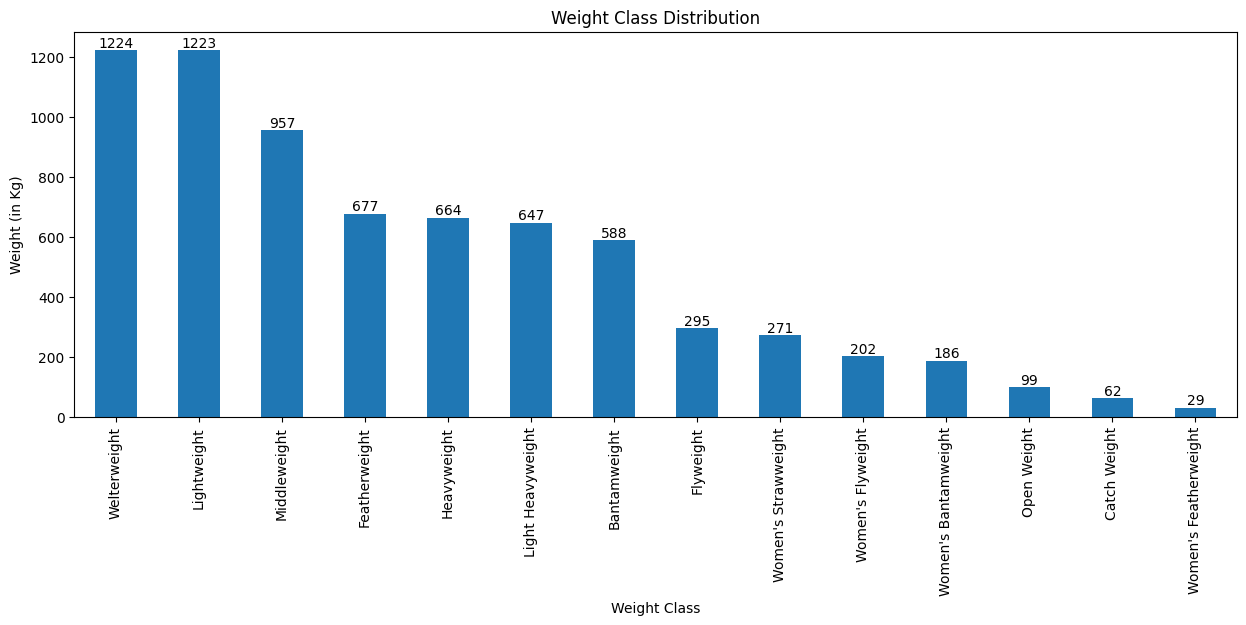

In [13]:
data_plot = fight['Weight Class'].value_counts()
data_plot.plot(kind='bar', figsize=(15,5))
#plt.pie(data_plot, labels=data_plot.index, autopct='%1.1f', explode = [0.02]*len(data_plot))
plt.xlabel('Weight Class')
plt.ylabel('Weight (in Kg)')
plt.title('Weight Class Distribution')

for i, value in enumerate(data_plot):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')
plt.show()

C:\Users\PRANJAL\AppData\Local\Temp\ipykernel_16244\3652687891.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap('Accent')(range(top))


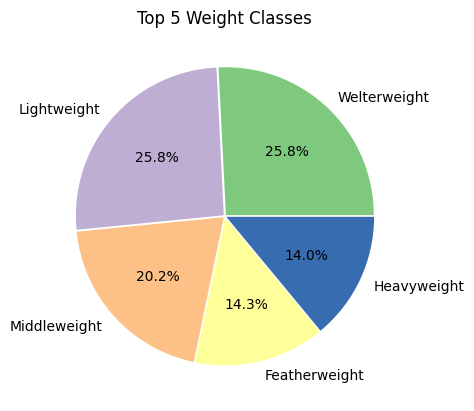

In [14]:
top = 5
data_plot = fight['Weight Class'].value_counts().head(top)
colors = get_cmap('Accent')(range(top))
plt.pie(data_plot, labels=data_plot.index, autopct='%1.1f%%', explode=[0.01]*top, colors=colors)
plt.title(f'Top {top} Weight Classes')
plt.show()

<b><center><h3>Referees having handled most fights (top 20)</h3></center></b>

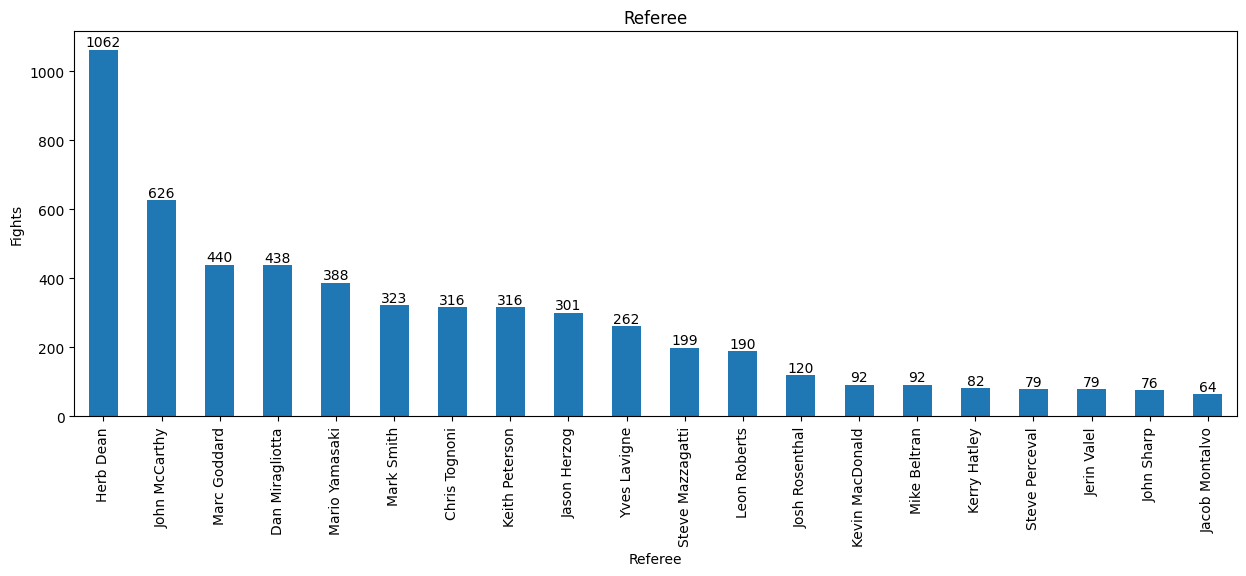

In [52]:
data_plot = fight['Referee'].value_counts().head(20)
data_plot.plot(kind='bar', figsize=(15,5))
#plt.pie(data_plot, labels=data_plot.index, autopct='%1.1f', explode = [0.02]*len(data_plot))
plt.xlabel('Referee')
plt.ylabel('Fights')
plt.title('Referee')

for i, value in enumerate(data_plot):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')
plt.show()

<b><center><h3>Sex Comparison</h3></center></b>

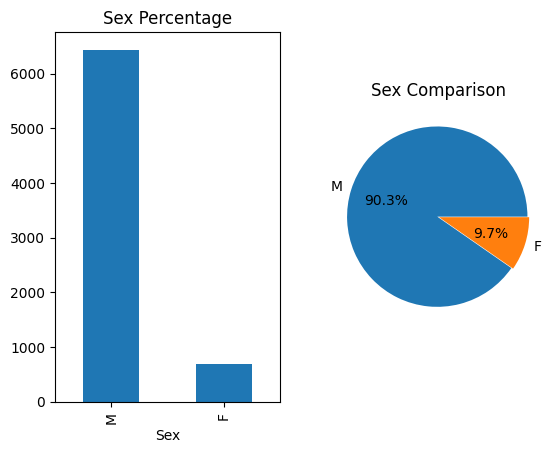

In [64]:
fig, ax = plt.subplots(1, 2)

data_plot = fight['Sex'].value_counts()

data_plot.plot(kind='bar', ax=ax[0])
ax[1].set_title('Sex Comparison')

ax[1].pie(data_plot, labels=data_plot.index, explode=[0.01]*len(data_plot), autopct='%1.1f%%')
ax[0].set_title('Sex Percentage')

plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_13416\3236438778.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap('Accent')(range(top))


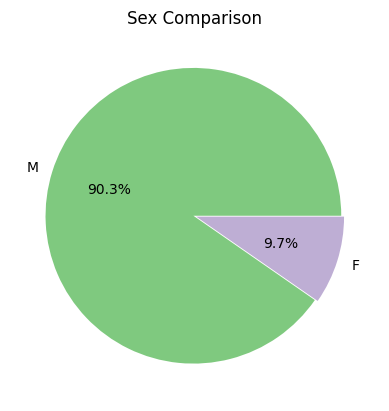

In [98]:
data_plot = fight['Sex'].value_counts()
colors = get_cmap('Accent')(range(top))
plt.pie(data_plot, labels=data_plot.index, autopct='%1.1f%%', explode=[0.01]*len(data_plot), colors=colors)
plt.title('Sex Comparison')
plt.show()

<b><center><h3>Injuries Type</h3></center></b>

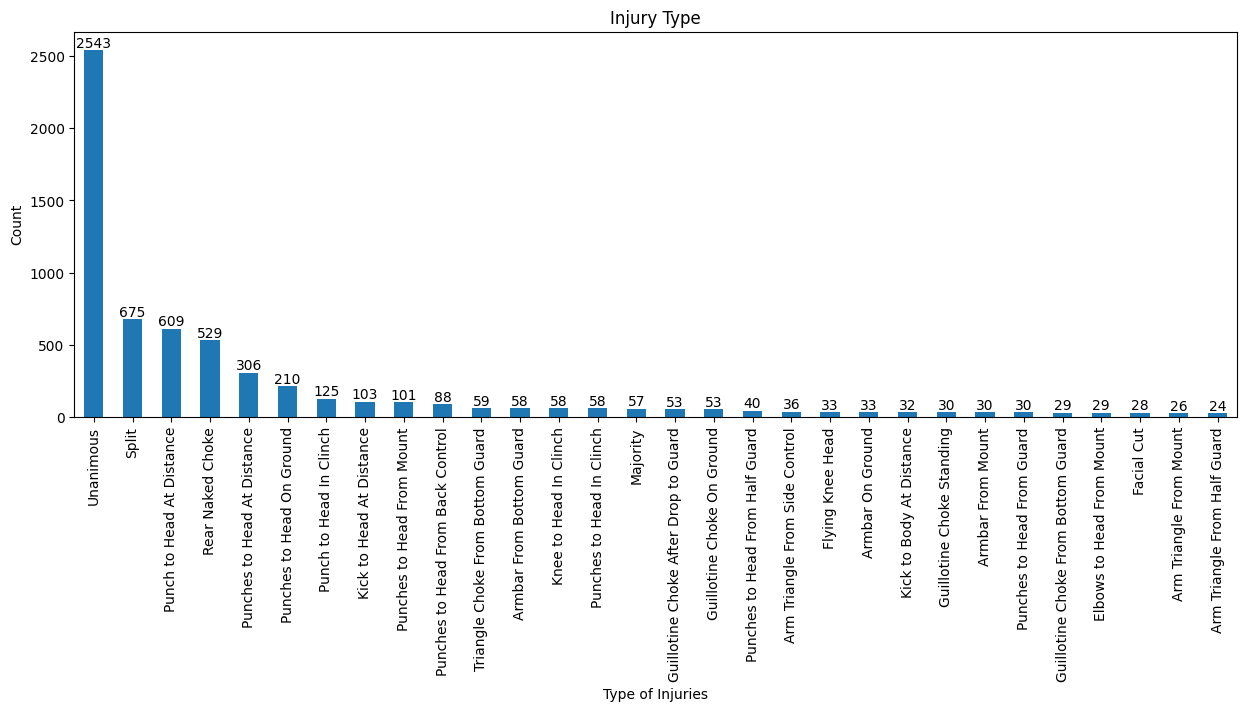

In [102]:
data_plot = fight['Detailed Result'].value_counts().head(30)
data_plot.plot(kind='bar', figsize=(15,5))
#plt.pie(data_plot, labels=data_plot.index, autopct='%1.1f', explode = [0.02]*len(data_plot))
plt.xlabel('Type of Injuries')
plt.ylabel('Count')
plt.title('Injury Type')

for i, value in enumerate(data_plot):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')
plt.show()

<b><center><h3>Final Result Type</h3></center></b>

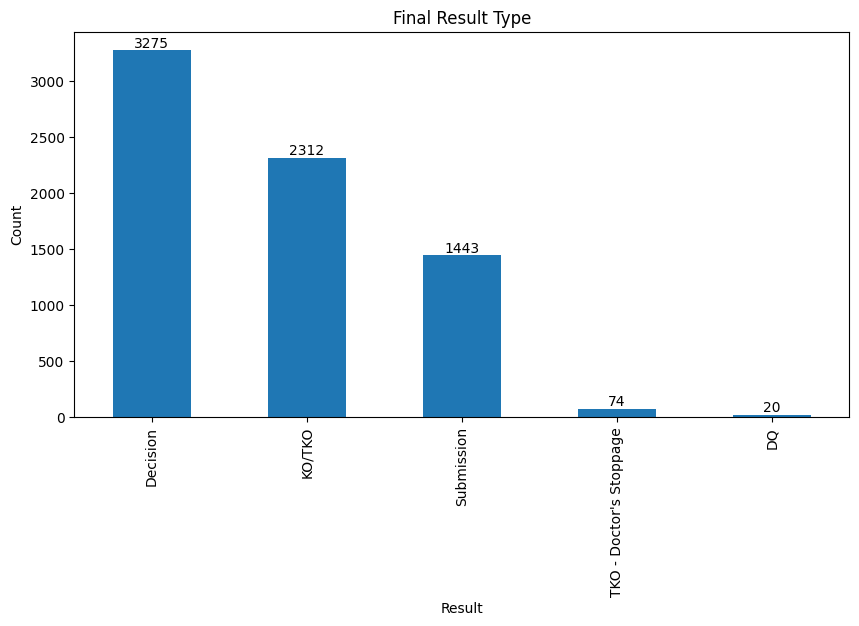

In [103]:
data_plot = fight['Result'].value_counts()
data_plot.plot(kind='bar', figsize=(10,5))
#plt.pie(data_plot, labels=data_plot.index, autopct='%1.1f', explode = [0.02]*len(data_plot))
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Final Result Type')

for i, value in enumerate(data_plot):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_13416\1181061415.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap('Accent')(range(len(data_plot)))


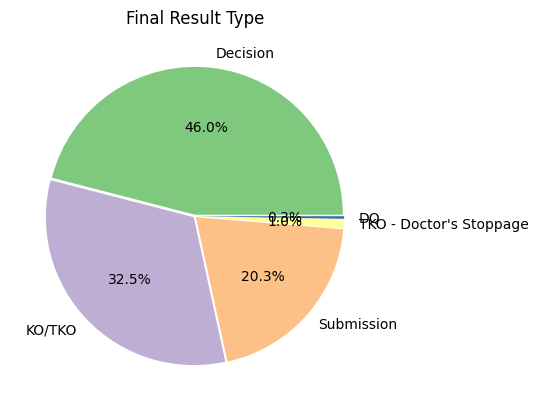

In [91]:
data_plot = fight['Result'].value_counts()
colors = get_cmap('Accent')(range(len(data_plot)))
plt.pie(data_plot, labels=data_plot.index, autopct='%1.1f%%', explode=[0.01]*len(data_plot), colors=colors,)
plt.title('Final Result Type')
plt.show()